In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.6


In [17]:
def build_box(robot,x,y,name=''):
    width=2
    thickness=0.5
    
    b1=Box(robot,
        x=0+x,
        y=width/2+thickness+y,
         width=width,height=thickness,
        name=name+':top')
    b2=Box(robot,
        x=0+x,
        y=-width/2-thickness+y,
         width=width,height=thickness,
        name=name+':bottom')
    b3=Box(robot,
        x=-width/2-thickness+x,
        y=0+y,
         width=thickness,height=width,
        name=name+':left')
    b4=Box(robot,
        x=+width/2+thickness+x,
        y=0+y,
         width=thickness,height=width,
        name=name+':right')
    
    connect(b1,[b2,b3,b4],'weld')
    
    return [b1,b2,b3,b4]

def build(robot):
    
    y=rand()*9+3
    bob=build_box(robot,4,y,'bob')
    
    disk=Disk(robot,4,y,radius=0.8,name='bob:center')  # radius = 0.5 default
    
    connect(disk,bob,'distance')

    robot.distances=[-1]*360    

        
    return robot


In [18]:
def go_to_distance(robot,goal_distance):
    right=robot['bob:right']
    distance=right.read_distance()
    if distance>goal_distance:
        right.F=0.8
    else:
        right.F=-0.8
           
def avoid_black(robot):
    center=robot['bob:center']
    right=robot['bob:right']

    color=center.read_color()
    
    if color[0]<0.4:
        right.F=-0.8
    
def scan_distances(robot):
    center=robot['bob:center']
    center.τ=.2
    
    a=int(center.angle % 360)  # round, so I don't repeat things
    d=center.read_distance()
    robot.distances[a]=d

def act(t,robot):

    if t<2:
        return
  
    go_to_distance(robot,3)
    avoid_black(robot)
    scan_distances(robot)

    robot.message=robot['bob:center'].read_distance()    

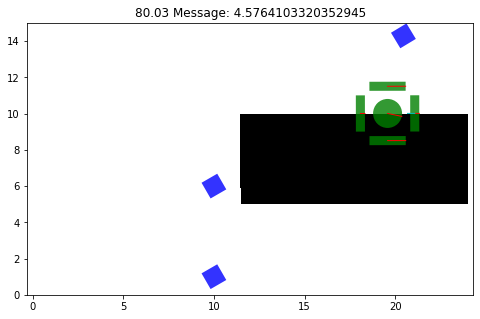

In [19]:
env=Environment(image='images/black stripe.png') 
robot=Robot(env)

robot=build(robot)


for y in arange(1,20,5):
    Box(env,10,y,width=1,height=1,angle=30,density=0.001)

run_sim(env,act,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
        plot_orientation=True,
        figure_width=8,
       )

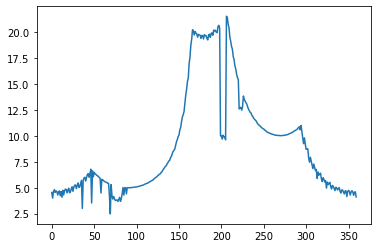

In [20]:
plot(robot.distances)

# What happens if I change the connection to the central disk to "weld" instead of "distance"?

In [21]:
def build(robot):
    
    y=rand()*9+3
    bob=build_box(robot,4,y,'bob')
    
    disk=Disk(robot,4,y,radius=0.8,name='bob:center')  # radius = 0.5 default
    
    connect(disk,bob,'weld')  # <=========== changed from "distance"

    robot.distances=[-1]*360    

        
    return robot


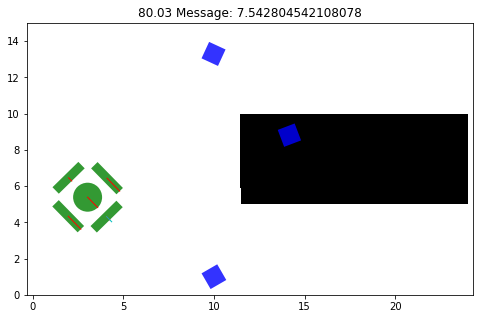

In [22]:
env=Environment(image='images/black stripe.png') 
robot=Robot(env)

robot=build(robot)


for y in arange(1,20,5):
    Box(env,10,y,width=1,height=1,angle=30,density=0.001)

run_sim(env,act,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
        plot_orientation=True,
        figure_width=8,
       )